In [1]:
import numpy as np
import pandas as pd
from scipy.stats import beta
import matplotlib.pyplot as plt

In [2]:
# Parameters
N = 1000  # Number of wagerers
n = 250   # Number of wagers per wagerer
true_win_rates = np.random.uniform(0.1, 0.6, N)  # True win rates for wagerers

# Simulate data
data = []
for i in range(N):
    win_rate = true_win_rates[i]
    wins = np.random.binomial(n=n, p=win_rate)
    losses = n - wins
    data.append({'wagerer_id': i, 'true_win_rate': win_rate, 'wins': wins, 'losses': losses})

df = pd.DataFrame(data)


In [3]:
# Prior parameters (Beta distribution)
alpha_prior = 2
beta_prior = 2

# Update posterior for each wagerer
df['alpha_posterior'] = alpha_prior + df['wins']
df['beta_posterior'] = beta_prior + df['losses']
df['posterior_mean'] = df['alpha_posterior'] / (df['alpha_posterior'] + df['beta_posterior'])

# Example: First few wagerers
print(df[['wagerer_id', 'true_win_rate', 'wins', 'losses', 'posterior_mean']].head())

   wagerer_id  true_win_rate  wins  losses  posterior_mean
0           0       0.542924   139     111        0.555118
1           1       0.301526    71     179        0.287402
2           2       0.184031    51     199        0.208661
3           3       0.105943    27     223        0.114173
4           4       0.499855   125     125        0.500000


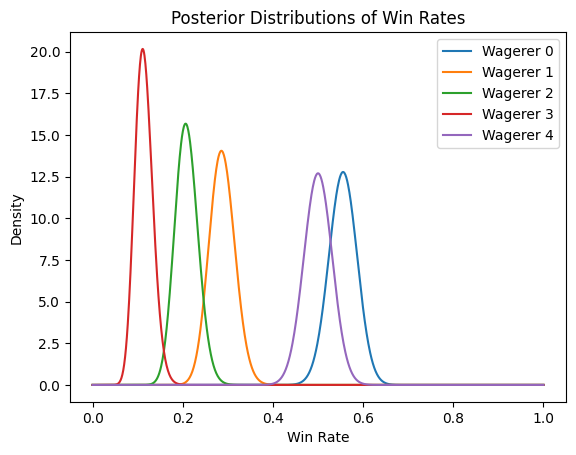

In [4]:
# Select wagerers to plot
wagerers_to_plot = [0, 1, 2, 3, 4]

# Plot posterior distributions
x = np.linspace(0, 1, 1000)
for i in wagerers_to_plot:
    alpha = df.loc[i, 'alpha_posterior']
    beta_param = df.loc[i, 'beta_posterior']
    plt.plot(x, beta.pdf(x, alpha, beta_param), label=f"Wagerer {i}")

plt.title("Posterior Distributions of Win Rates")
plt.xlabel("Win Rate")
plt.ylabel("Density")
plt.legend()
plt.show()


In [5]:
# Segmentation
high_win_rate = df[df['posterior_mean'] > 0.5]
low_win_rate = df[df['posterior_mean'] < 0.2]
mid_range = df[(df['posterior_mean'] >= 0.2) & (df['posterior_mean'] <= 0.5)]

# Summary
print(f"High Win Rate: {len(high_win_rate)} wagerers")
print(f"Low Win Rate: {len(low_win_rate)} wagerers")
print(f"Mid-Range: {len(mid_range)} wagerers")


High Win Rate: 213 wagerers
Low Win Rate: 184 wagerers
Mid-Range: 603 wagerers
